In [8]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

In [9]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/bulk-water/"

In [10]:
from matplotlib import pyplot as plt

In [16]:
all_N = []
all_R1_intra = []
all_R2_intra = []
all_gij_intra = []
for N in ["N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", "N1002", "N1589", "N2521", "N4000"]:
    intra = "bulk-water/raw_data/" + N + "_intra_step1.npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C_intra = np.real(dictionary.item()["C"])
    R1_intra = np.real(dictionary.item()["R1"])
    R2_intra = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_N.append(np.float32(N[1:]))
    all_R1_intra.append(R1_intra)
    all_R2_intra.append(R2_intra)
    all_gij_intra.append(C_intra)
all_N = np.array(all_N)
# 
all_R10_intra_vs_N = []
for R1 in all_R1_intra:
    all_R10_intra_vs_N.append(R1[1])
all_R10_intra_vs_N = np.float32(all_R10_intra_vs_N)
print("actual frequency :", f[1] , "MHz")
all_R20_intra_vs_N = []
for R2 in all_R2_intra:
    all_R20_intra_vs_N.append(R2[1])
all_R20_intra_vs_N = np.float32(all_R20_intra_vs_N)
all_N = []
all_R1_inter = []
all_R2_inter = []
all_gij_inter = []
for N in ["N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", "N1002", "N1589", "N2521", "N4000"]:
    intra = "bulk-water/raw_data/" + N + "_inter_step1.npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C_inter = np.real(dictionary.item()["C"])
    R1_inter = np.real(dictionary.item()["R1"])
    R2_inter = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_N.append(np.float32(N[1:]))
    all_R1_inter.append(R1_inter)
    all_R2_inter.append(R2_inter)
    all_gij_inter.append(C_inter)
all_N = np.array(all_N)
# 
all_R10_inter_vs_N = []
for R1 in all_R1_inter:
    all_R10_inter_vs_N.append(R1[1])
all_R10_inter_vs_N = np.float32(all_R10_inter_vs_N)
print("actual frequency :", f[1] , "MHz")
all_R20_inter_vs_N = []
for R2 in all_R2_inter:
    all_R20_inter_vs_N.append(R2[1])
all_R20_inter_vs_N = np.float32(all_R20_inter_vs_N)

actual frequency : 499.50049950049953 MHz
actual frequency : 499.50049950049953 MHz


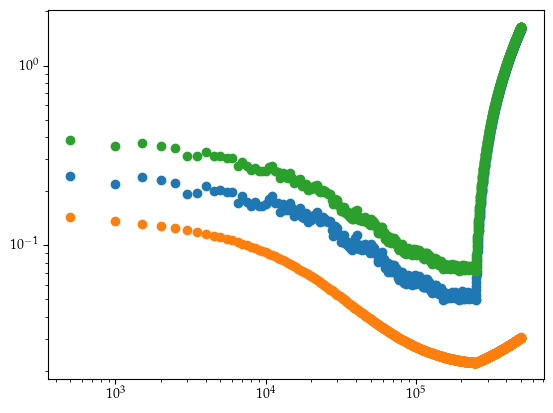

In [19]:
plt.loglog(f, R1_intra, 'o')
plt.loglog(f, R1_inter, 'o')
plt.loglog(f, R1_inter+R1_intra, 'o')

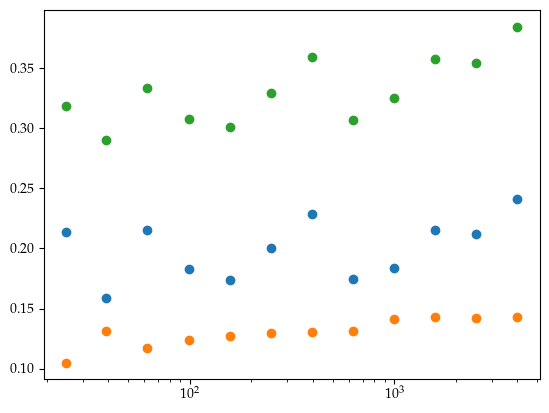

In [22]:
plt.semilogx(all_N, all_R10_intra_vs_N, "o")
plt.semilogx(all_N, all_R10_inter_vs_N, "o")
plt.semilogx(all_N, all_R10_intra_vs_N + all_R10_inter_vs_N, "o")

In [62]:
all_step = []
all_R1_2 = []
all_R2_2 = []
all_gij_2 = []
all_f_2 = []
all_t_2 = []
for step in [1, 2, 4, 8, 16, 32]:
    intra = "bulk-water/raw_data/N4000_intra_step"+str(step)+".npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_step.append(step)
    all_R1_2.append(R1)
    all_R2_2.append(R2)
    all_gij_2.append(C)
    all_f_2.append(f)
    all_t_2.append(t)
all_step = np.array(all_step)
# 
all_R10_vs_step = []
for R1 in all_R1_2:
    all_R10_vs_step.append(R1[1])
print("actual frequency :", f[1] , "MHz")
all_R20_vs_step = []
for R2 in all_R2_2:
    all_R20_vs_step.append(R2[1])
all_R10_vs_step = np.float32(all_R10_vs_step)
all_R20_vs_step = np.float32(all_R20_vs_step)

actual frequency : 496.031746031746 MHz


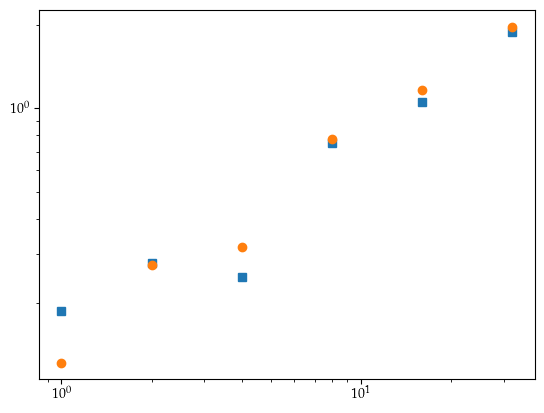

In [63]:
plt.loglog(all_step, all_R20_vs_step, "s")
plt.loglog(all_step, all_R10_vs_step, "o")

In [49]:
len(all_R10_vs_step)

12

ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)

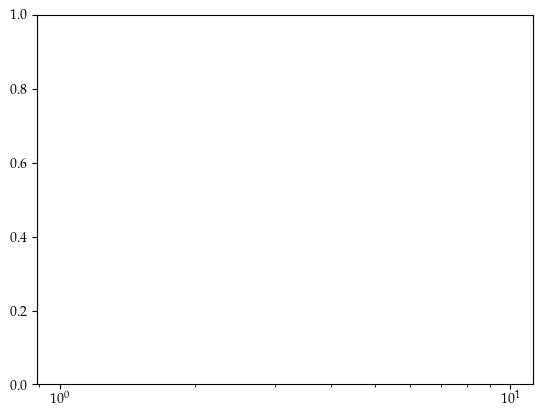

In [43]:
plt.semilogx(all_N, all_R10_vs_step, "o")
plt.semilogx(all_N, all_R20_vs_step, "s")

In [36]:
from scipy import constants as cst
spin = 0.5
GAMMA = 2 * np.pi * 42.6e6
K = (3 / 2) * (cst.mu_0 / 4 / np.pi) ** 2 \
    * cst.hbar ** 2 * GAMMA ** 4 * spin * (1 + spin)  # m6 / s2

In [37]:
R1_grivet = np.loadtxt("lennard-jones-fluid/Grivet2005/data-R1-R2/R1.dat")
T_grivet, R1_grivet = R1_grivet.T
R1_grivet *= K / (3e-10)**6 * (463.79e-15)
R2_grivet = np.loadtxt("lennard-jones-fluid/Grivet2005/data-R1-R2/R2.dat")
_, R2_grivet = R2_grivet.T
R2_grivet *= K / (3e-10)**6 * (463.79e-15)

In [38]:
#  mfc='none', markersize=24, markerfacecolor='white'

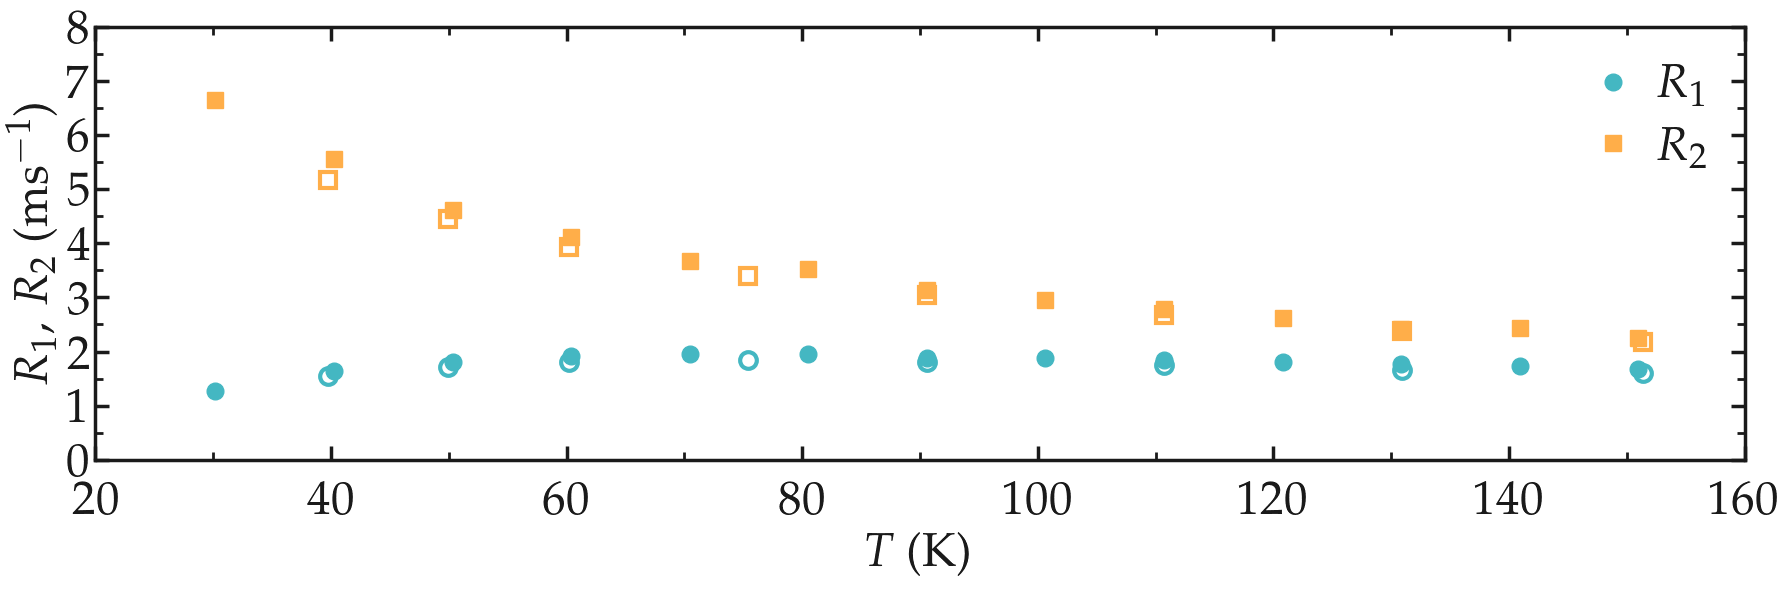

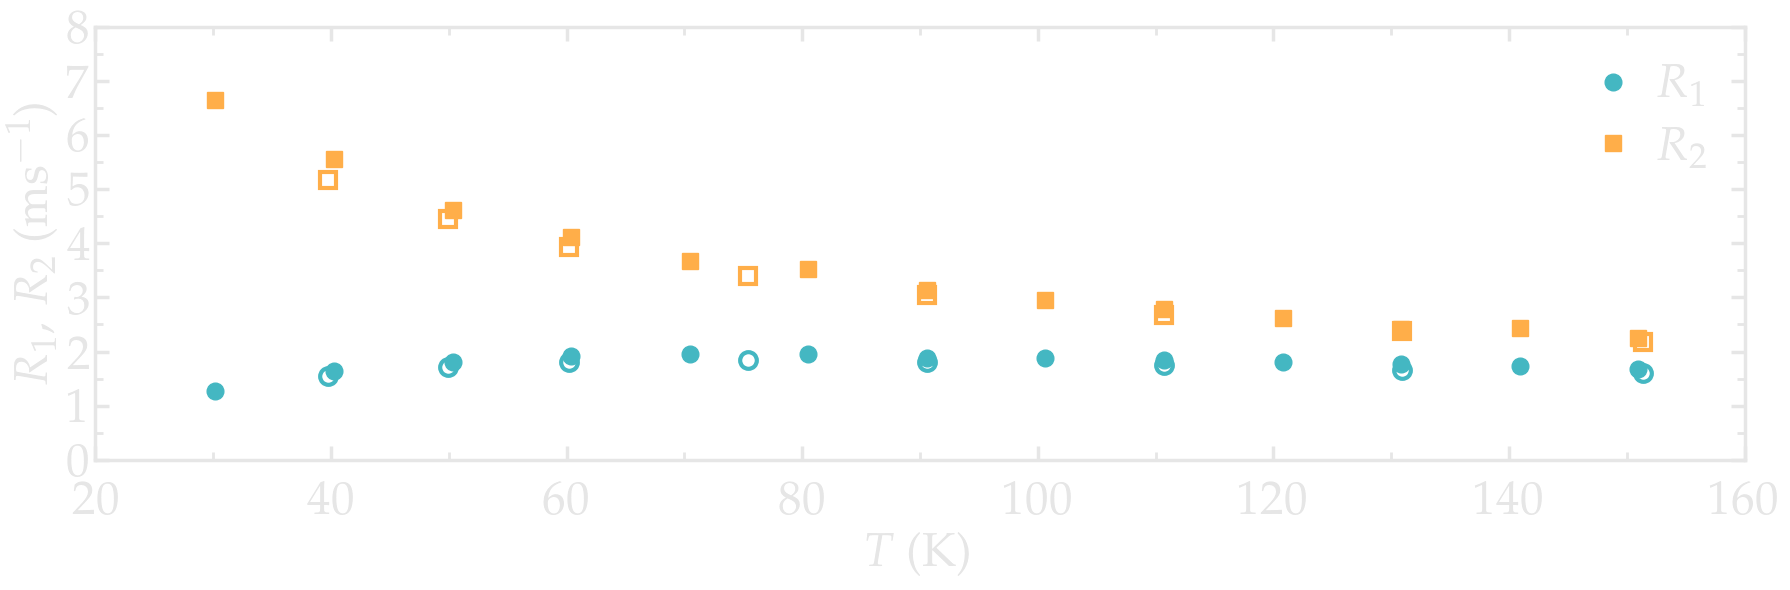

In [39]:
filename = "R1_spectra"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(all_T*50.32, all_R10*1000, 'o', color=colors["mycyan"],
                markersize = 12, linewidth=4, label=r'$R_1$')
    ax[-1].plot(all_T*50.32, all_R20*1000, 's', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'$R_2$')
    ax[-1].plot(T_grivet*50.32, R1_grivet*1000/6, 'o', color=colors["mycyan"], mfc='none', markeredgewidth=3,
                markersize = 12, linewidth=4)
    ax[-1].plot(T_grivet*50.32, R2_grivet*1000/6, 's', color=colors["myorange"], mfc='none', markeredgewidth=3,
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$T$ (K)', r'$R_1, \, R_2$ (ms$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(20, 160), y_boundaries=(0, 8)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [40]:
G_grive_08 = np.loadtxt("lennard-jones-fluid/Grivet2005/data-G/T0.8.dat")
G_grive_30 = np.loadtxt("lennard-jones-fluid/Grivet2005/data-G/T3.0.dat")

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


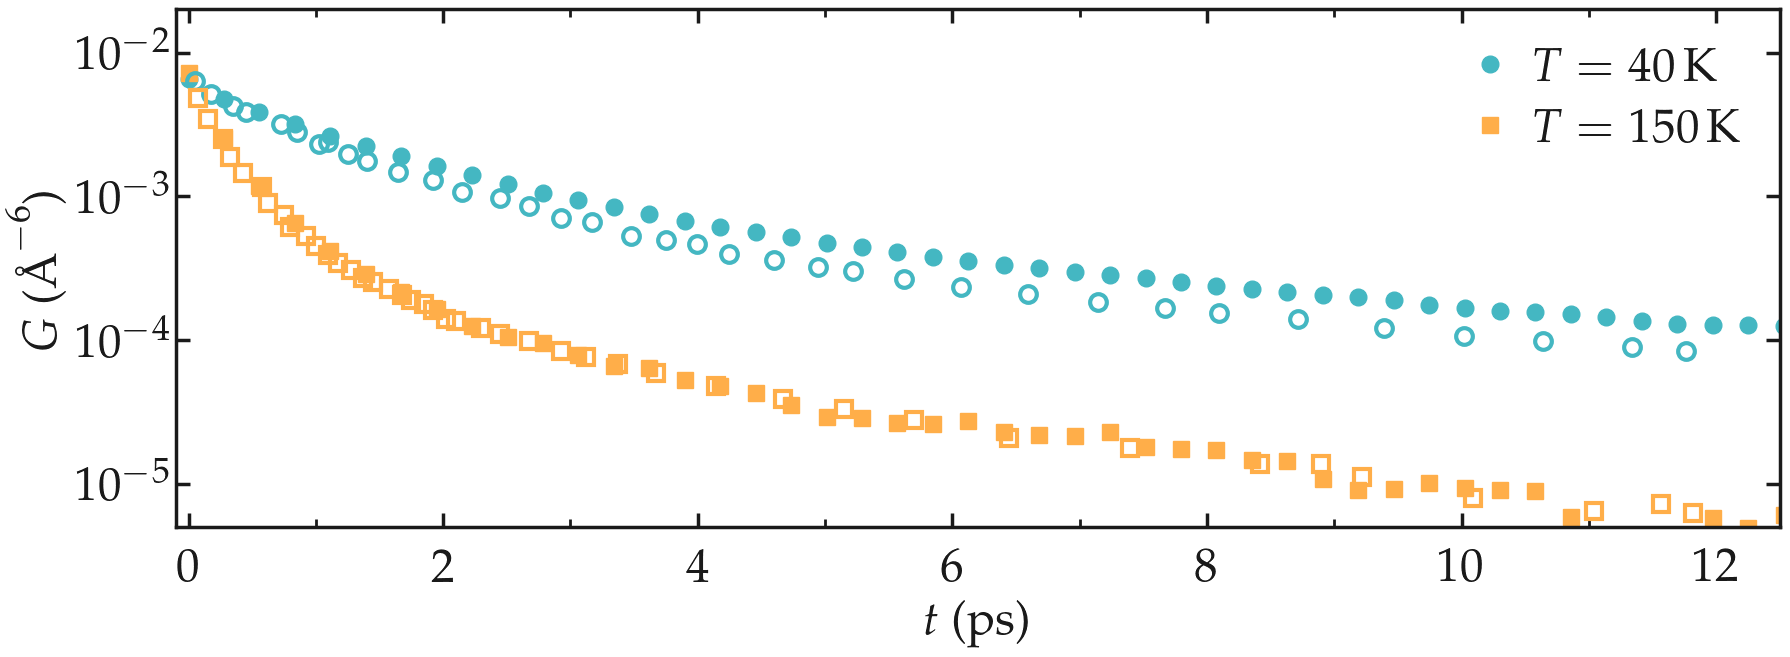

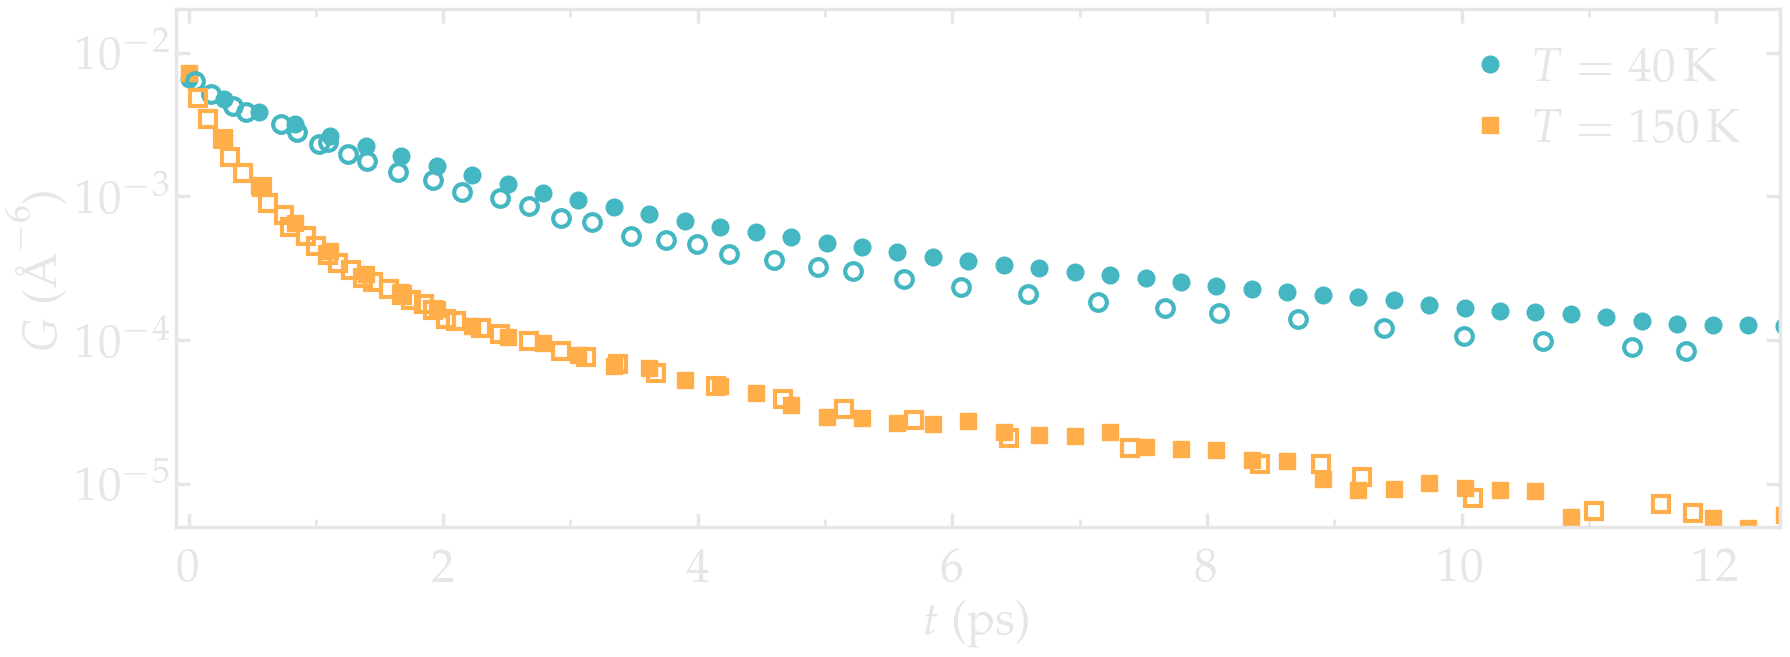

In [41]:
filename = "G_correlation"
sigma = 3 # A
tconvert = 463.79e-15 # s
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    #print(all_T[1]*50, all_T[-2]*50)
    ax[-1].semilogy(t[::12], all_gij[1][::12], 'o', color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$T = 40$\,K')
    ax[-1].semilogy(t[::12], all_gij[-2][::12], 's', color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$T = 150$\,K')
    ax[-1].semilogy(G_grive_08.T[0]*(tconvert*1e12), G_grive_08.T[1]/(sigma)**6, 'o', mfc='none', markeredgewidth=3,
                    color=colors["mycyan"], markersize = 12, linewidth=4)
    ax[-1].semilogy(G_grive_30.T[0]*(tconvert*1e12), G_grive_30.T[1]/(sigma)**6, 's', mfc='none', markeredgewidth=3,
                    color=colors["myorange"], markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$t$ (ps)', r'$G$ ($\textrm{\AA}^{-6}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.1, 12.5), y_boundaries=(5e-6, 2e-2)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)